# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

### Problem definition

This analysis aims to explore how different factors — such as location, room type, and host activity — influence Airbnb rental prices in New York City in 2019.

### We import the data and create the Dataframe

In [2]:
df = pd.read_csv("/workspaces/josefina-aispuro-merelles-machine-learning/data/raw/internal-link.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Descriptive analysis

In [3]:
# Check the dimensions
df.shape

(48895, 16)

In [4]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Generate a statistical summary of numerical columns and transpose it for readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


### Observations
- There are 48895 rows and 16 columns.
- Most columns have very few missing values, except for the last_review and reviews_per_month columns, which both have around 10000 missing values.
- The data contains 10 numerical features and 6 categorical features.


### Data cleaning

In [6]:
# Looking for duplicated data
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

### Observations
No duplicated rows were found in the dataset. If any duplicates were present, they would have been removed.

In [7]:
# Dropping columns with many missing values that are not relevant to price analysis
df.drop(["last_review", "reviews_per_month"], axis = 1, inplace = True)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


In [8]:
# Dropping irrelevant information
df.drop(["id", "name", "host_id", "host_name"], axis = 1, inplace = True)

In [9]:
df.drop(["neighbourhood"], axis = 1, inplace = True)
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,6,2


### Observations
- Non-informative columns such as id, name, host_id, and host_name were removed, as they do not contribute to the price analysis.
- Since we already have numerical coordinates (latitude and longitude) and neighbourhood_group, the neighbourhood column is redundant and has been removed to simplify the dataset.

### Visualization (univariate)

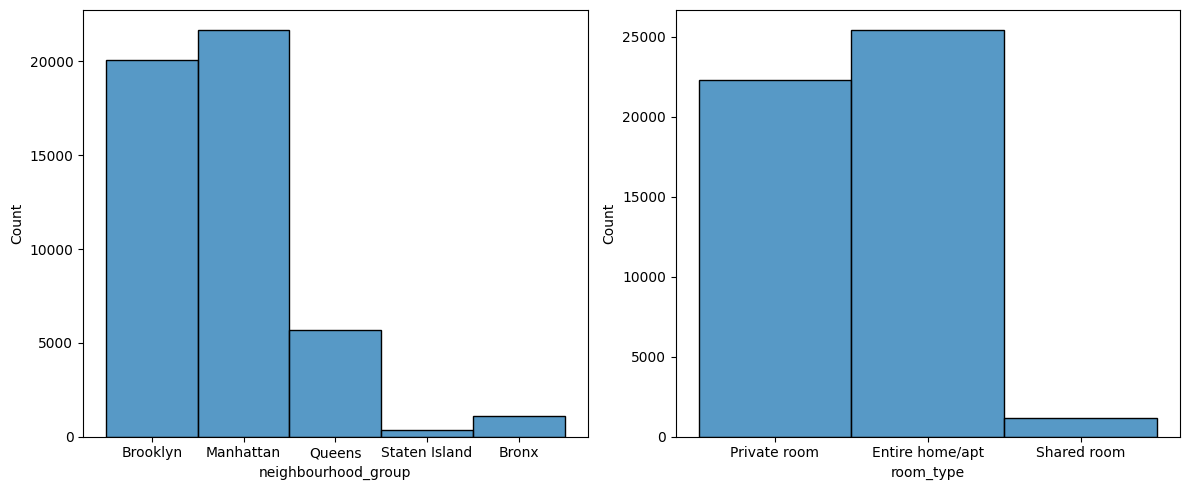

In [10]:
# Visualization of categorical features
fig, axis = plt.subplots(1, 2, figsize = (12, 5))

sns.histplot(ax = axis[0], data = df, x = "neighbourhood_group").set(ylabel = "Count")
sns.histplot(ax = axis[1], data = df, x = "room_type").set(ylabel = "Count")

plt.tight_layout()
plt.show()

### Observations
We can observe that most listings are located in the Manhattan and Brooklyn neighborhoods, while Bronx and Staten Island have the fewest. We can also see that entire apartments and private rooms are the most common types of listings, whereas shared rooms are quite rare.

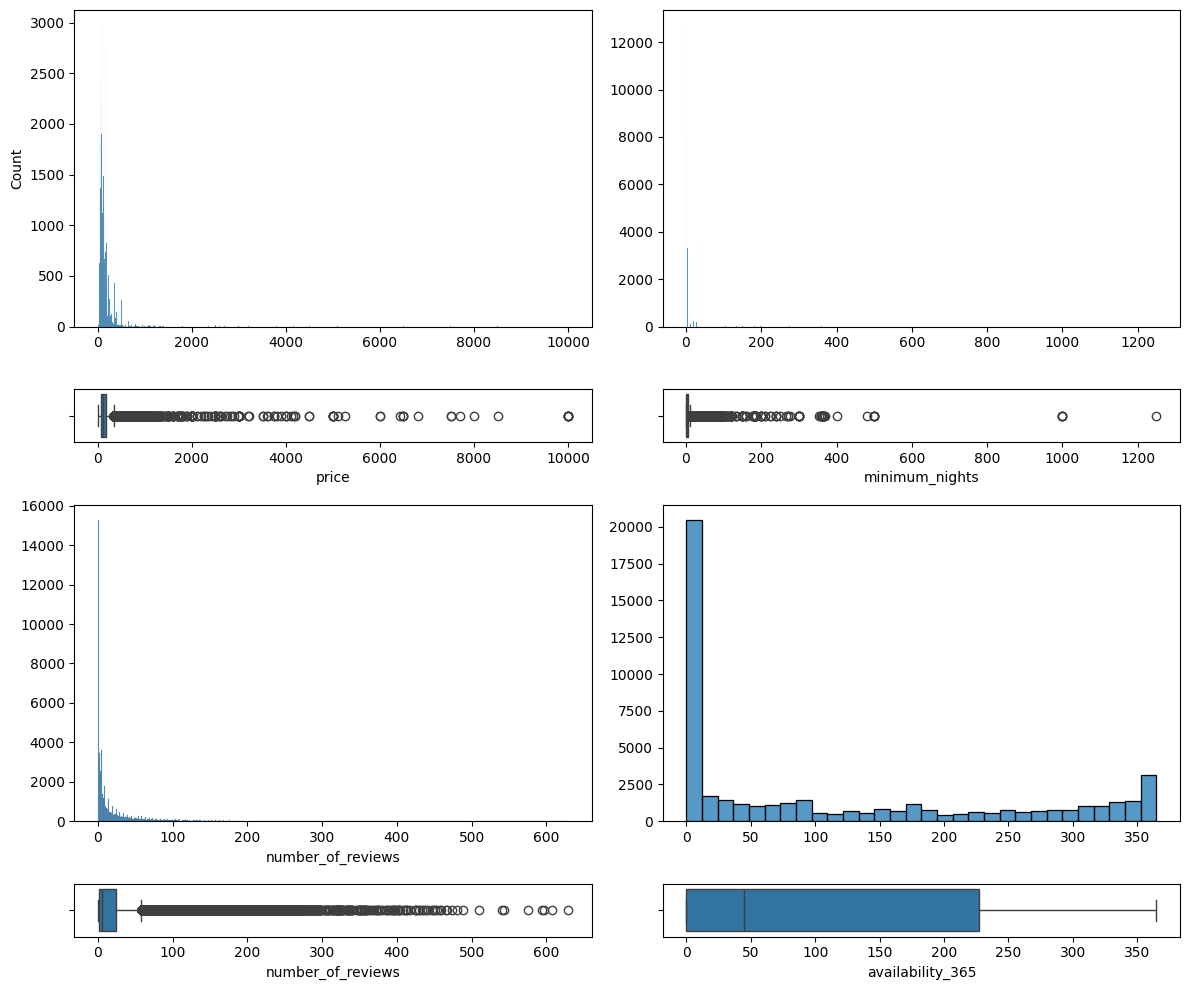

In [11]:
# Visualization of numerical features
fig, axis = plt.subplots(4, 2, figsize = (12, 10), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

# Creating a multiple-plot figure with histograms and boxplots
sns.histplot(ax = axis[0,0], data = df, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1,0], data = df, x = "price")

sns.histplot(ax = axis[0,1], data = df, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[2,0], data = df, x = "number_of_reviews").set(ylabel = None)
sns.boxplot(ax = axis[3,0], data = df, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = df, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3,1], data = df, x = "availability_365")

plt.tight_layout()
plt.show()

### Observations
- We can see that most accommodation prices are low, although there are a few very high values (outliers).
- We also observe that most listings have a very small minimum stay (1 or a few nights), but there are some extreme cases with very long minimum stays.
- Most listings have very few reviews, although a few have a lot (outliers).
- Regarding yearly availability, most listings are available for only a few days or almost the entire year, showing an uneven distribution.


### Visualization (multivariate)

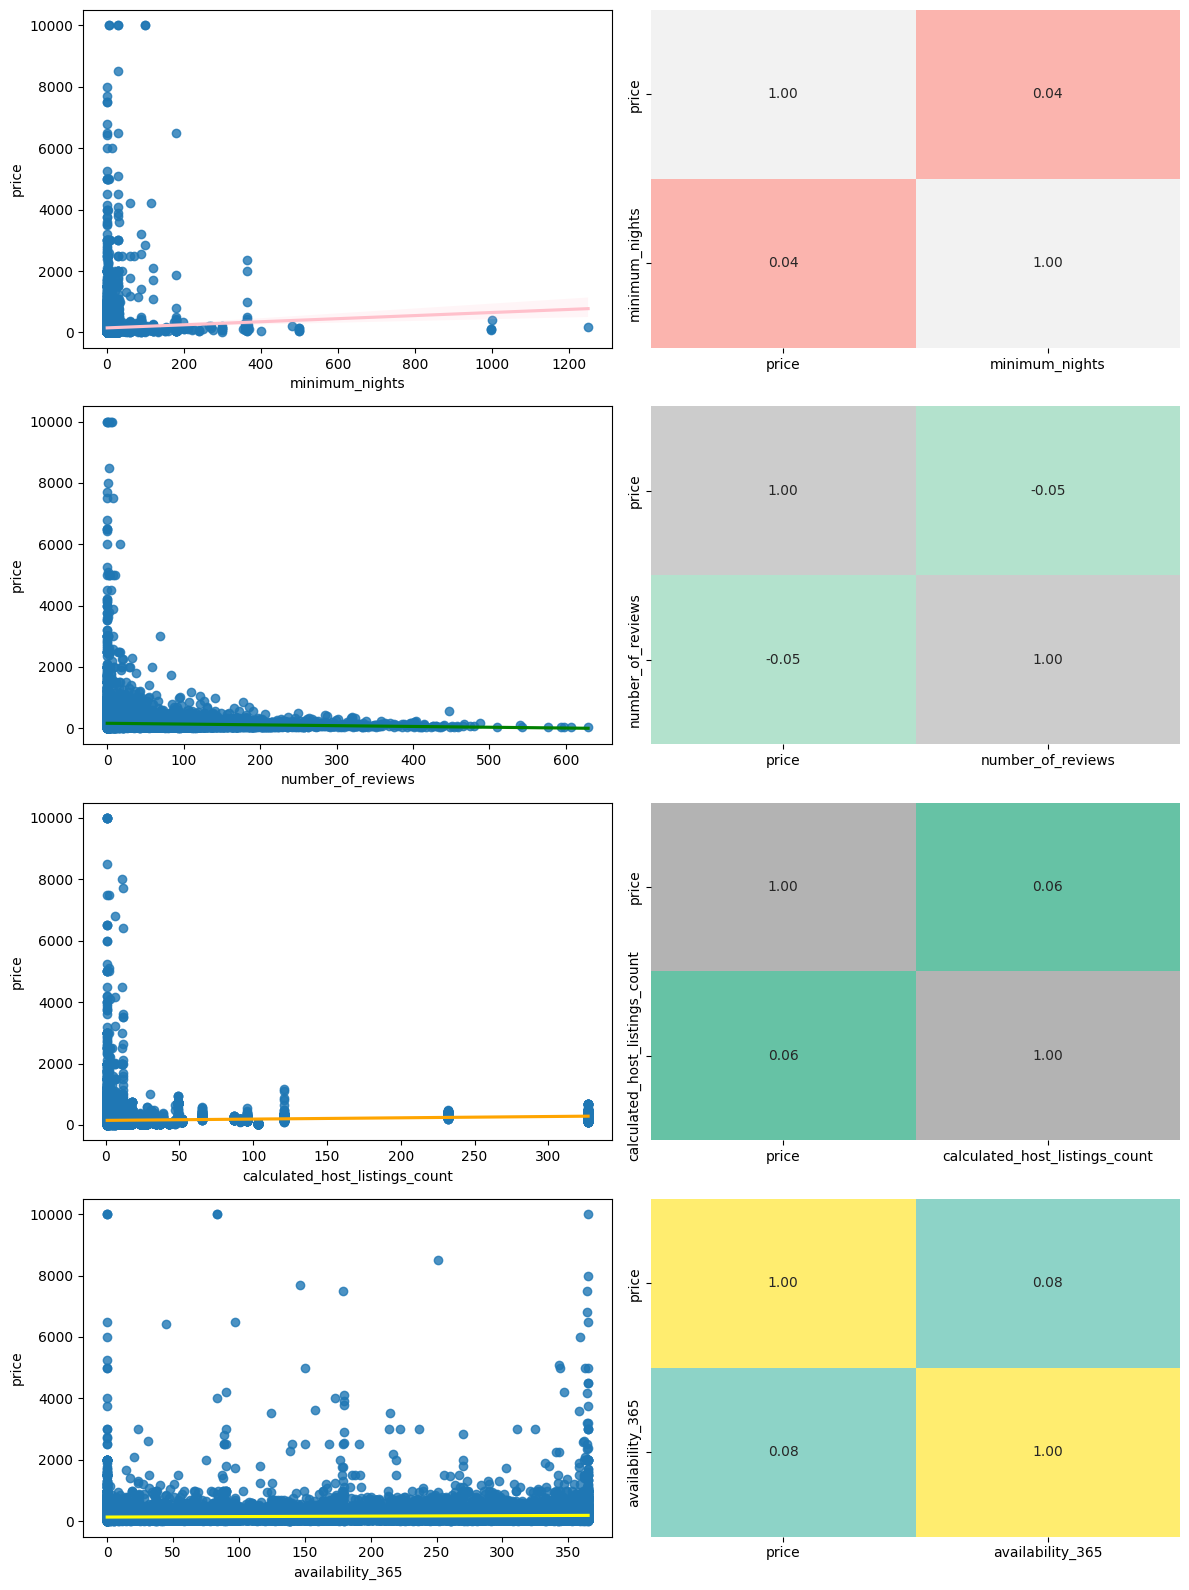

In [12]:
# Numerical correlations
corr_price_minimum = df[["price", "minimum_nights"]].corr()
corr_price_reviews = df[["price", "number_of_reviews"]].corr()
corr_price_listings = df[["price", "calculated_host_listings_count"]].corr()
corr_price_availability = df[["price", "availability_365"]].corr()

# Create a 4x2 figure for scatterplots and heatmaps
fig, axis = plt.subplots(4, 2, figsize=(12, 16))

# Scatterplots and regression lines
sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price", line_kws = {"color": "pink"})
sns.heatmap(ax = axis[0, 1], data = corr_price_minimum, annot = True, fmt = ".2f", cbar = False, cmap = "Pastel1")

sns.regplot(ax = axis[1, 0], data = df, x = "number_of_reviews", y = "price", line_kws = {"color": "green"})
sns.heatmap(ax = axis[1, 1], data = corr_price_reviews, annot = True, fmt = ".2f", cbar = False, cmap = "Pastel2")

sns.regplot(ax = axis[2, 0], data = df, x = "calculated_host_listings_count", y = "price", line_kws = {"color": "orange"})
sns.heatmap(ax = axis[2, 1], data = corr_price_listings, annot = True, fmt = ".2f", cbar = False, cmap = "Set2")

sns.regplot(ax = axis[3, 0], data = df, x = "availability_365", y = "price", line_kws = {"color": "yellow"})
sns.heatmap(ax = axis[3, 1], data = corr_price_availability, annot = True, fmt = ".2f", cbar = False, cmap = "Set3")

plt.tight_layout()
plt.show()

### Observations
We can observe that the numerical variables are not related to the price. This is clearly shown in the heatmap, which displays a correlation very close to 0 in all four cases.

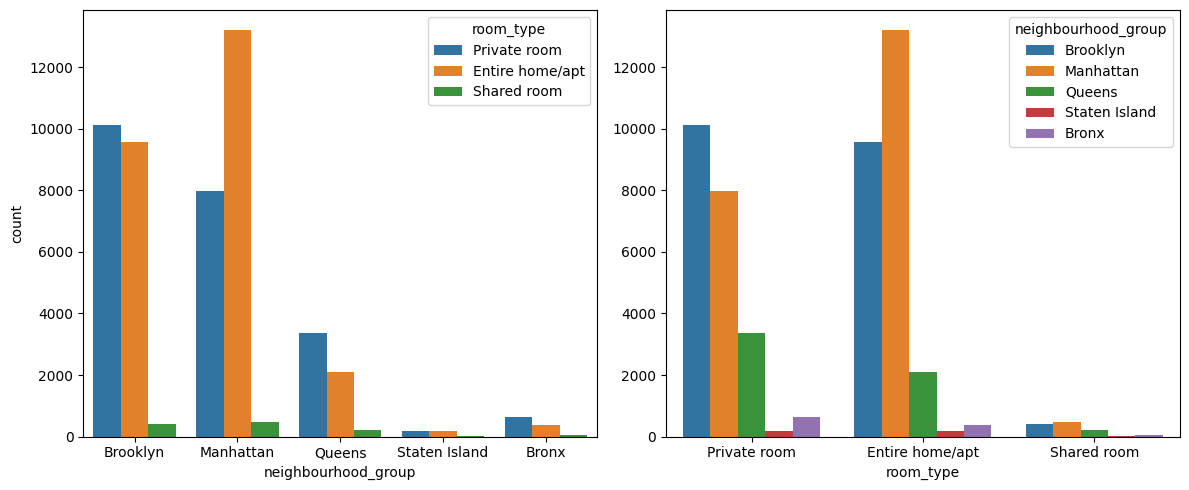

In [13]:
# Categorical correlations
fig, axis = plt.subplots(1, 2, figsize = (12, 5))

sns.countplot(ax = axis[0], data = df, x = "neighbourhood_group", hue = "room_type")
sns.countplot(ax = axis[1], data = df, x = "room_type", hue = "neighbourhood_group").set(ylabel = None)

plt.tight_layout()
plt.show()

### Observations
- We can see that Manhattan and Brooklyn are the neighborhoods with the most entire apartments and private rooms available.
- Staten Island, on the other hand, has the fewest options.
- We can also confirm the scarcity of shared rooms, regardless of the neighborhood in which they are located.

### One Hot Encoding

In [14]:
cat_columns = ["neighbourhood_group", "room_type"]  # Selecting categorical features
encoder = OneHotEncoder(sparse_output = False)  # Creating One Hot Encoder (no disperse matrix)
encoded = encoder.fit_transform(df[cat_columns])  # Fit (learns how many features on each column) and transform (binary) our original columns
encoded_df = pd.DataFrame(encoded, columns = encoder.get_feature_names_out(cat_columns), index = df.index)  # Transform result into a DataFrame (creating new column names with the original ones and same index as original df)
df_encoded = pd.concat([df.drop(columns = cat_columns), encoded_df], axis = 1)  # Concatenating our DataFrames (dropping the original columns from our original df and adding the new one)
df_encoded

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,6,365,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,40.75362,-73.98377,225,1,45,2,355,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,40.80902,-73.94190,150,3,0,1,365,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,40.68514,-73.95976,89,1,270,1,194,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,40.79851,-73.94399,80,10,9,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,2,9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
48891,40.70184,-73.93317,40,4,0,2,36,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
48892,40.81475,-73.94867,115,10,0,1,27,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
48893,40.75751,-73.99112,55,1,0,6,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Train / Test Split

In [15]:
# Define X (features) and y (target)
X = df_encoded.drop(columns = ["price"], axis = 1)
y = df_encoded["price"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Feature Scaling

In [16]:
# Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Scaled DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns).reset_index(drop = True)
X_test_scaled_df  = pd.DataFrame(X_test_scaled, columns = X_test.columns).reset_index(drop = True)

In [18]:
X_train_scaled_df.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-0.241172,-0.064946,-0.193025,-0.277198,-0.186570,-0.852862,-0.15029,1.195897,-0.894201,-0.359737,-0.087023,0.958818,-0.914614,-0.155111
1,2.204077,0.257030,-0.239596,-0.479451,-0.186570,-0.860447,-0.15029,-0.836193,1.118317,-0.359737,-0.087023,-1.042950,1.093358,-0.155111
2,-0.714824,-0.155542,-0.239596,-0.524396,-0.156424,-0.860447,-0.15029,1.195897,-0.894201,-0.359737,-0.087023,-1.042950,1.093358,-0.155111
3,-0.818573,0.459080,-0.193025,1.430714,-0.186570,1.164663,-0.15029,1.195897,-0.894201,-0.359737,-0.087023,0.958818,-0.914614,-0.155111
4,0.332197,1.231213,-0.099884,-0.232253,-0.186570,-0.860447,-0.15029,-0.836193,-0.894201,2.779812,-0.087023,-1.042950,1.093358,-0.155111


### Feature Selection

In [19]:
selection_model = SelectKBest(score_func = f_regression, k = 8)  # Create a feature selector that keeps the 8 best features based on their correlation with the target
selection_model.fit(X_train, y_train) #  Fit the selector to the training data (learn which features are most important)

# Apply the feature selection to the training and test set
selection_model_transform_train = selection_model.transform(X_train)
selection_model_transform_test = selection_model.transform(X_test)

ix = selection_model.get_support()  # Get a boolean mask showing which features were selected (True = selected)

# Create a new DataFrame for the selected training and test features with their original column names
X_train_sel = pd.DataFrame(selection_model_transform_train, columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model_transform_test, columns = X_test.columns.values[ix])

X_train_sel.head()

,longitude,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,room_type_Entire home/apt,room_type_Private room
0,-73.95530,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,-73.94048,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-73.95947,2.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-73.93118,1.0,267.0,1.0,0.0,0.0,1.0,0.0
4,-73.89564,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [20]:
# Save the processed training and testing datasets (features and target) as CSV files
X_train_sel.to_csv("/workspaces/josefina-aispuro-merelles-machine-learning/data/processed/X_train_sel.csv", index = False)
X_test_sel.to_csv("/workspaces/josefina-aispuro-merelles-machine-learning/data/processed/X_test_sel.csv", index = False)
y_train.to_csv("/workspaces/josefina-aispuro-merelles-machine-learning/data/processed/y_train_sel.csv", index = False)
y_test.to_csv("/workspaces/josefina-aispuro-merelles-machine-learning/data/processed/y_test_sel.csv", index = False)